# Chronic Kidney Disease Prediction using Random Forest
This demonstrates how to use a Random Forest Classifier to predict chronic kidney disease from a dataset. It includes data loading, preprocessing, training, and evaluation.

In [2]:
! pip install pandas 
! pip install numpy
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("Chronic_Kidney_Dsease_data.csv", encoding='utf-8', on_bad_lines='skip')
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy', 'Diagno

In [5]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Cleaned column names:", df.columns.tolist())

Cleaned column names: ['patientid', 'age', 'gender', 'ethnicity', 'socioeconomicstatus', 'educationlevel', 'bmi', 'smoking', 'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality', 'familyhistorykidneydisease', 'familyhistoryhypertension', 'familyhistorydiabetes', 'previousacutekidneyinjury', 'urinarytractinfections', 'systolicbp', 'diastolicbp', 'fastingbloodsugar', 'hba1c', 'serumcreatinine', 'bunlevels', 'gfr', 'proteininurine', 'acr', 'serumelectrolytessodium', 'serumelectrolytespotassium', 'serumelectrolytescalcium', 'serumelectrolytesphosphorus', 'hemoglobinlevels', 'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl', 'cholesteroltriglycerides', 'aceinhibitors', 'diuretics', 'nsaidsuse', 'statins', 'antidiabeticmedications', 'edema', 'fatiguelevels', 'nauseavomiting', 'musclecramps', 'itching', 'qualityoflifescore', 'heavymetalsexposure', 'occupationalexposurechemicals', 'waterquality', 'medicalcheckupsfrequency', 'medicationadherence', 'healthliteracy', 'diag

In [6]:
# Handle missing values and encode categorical columns
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))
print(le)

LabelEncoder()


In [7]:
# Define features and target
if 'gender' not in df.columns:
    raise ValueError("Target column 'gender' not found. Please check the exact column name.")

X = df.drop("gender", axis=1)
y = df["gender"]
print(X)
print(y)

      patientid  age  ethnicity  socioeconomicstatus  educationlevel  \
0             1   71          0                    0               2   
1             2   34          0                    1               3   
2             3   80          1                    0               1   
3             4   40          2                    0               1   
4             5   43          1                    1               2   
...         ...  ...        ...                  ...             ...   
1654       1655   90          0                    1               2   
1655       1656   34          0                    2               1   
1656       1657   84          0                    2               3   
1657       1658   90          0                    2               2   
1658       1659   34          1                    0               0   

            bmi  smoking  alcoholconsumption  physicalactivity  dietquality  \
0     31.069414        1            5.128112          1.

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1]


In [12]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.536144578313253

 Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.40      0.47       169
           1       0.52      0.67      0.59       163

    accuracy                           0.54       332
   macro avg       0.54      0.54      0.53       332
weighted avg       0.54      0.54      0.53       332



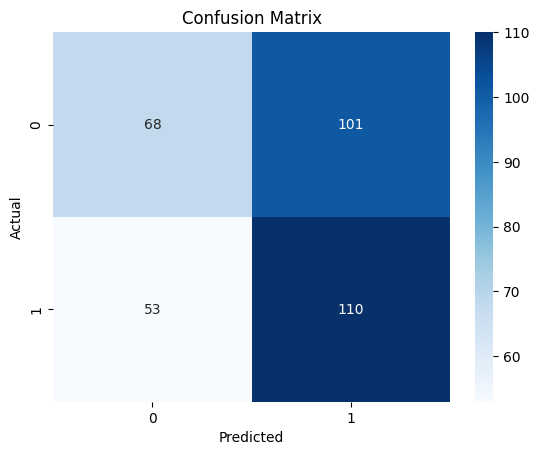

In [ ]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

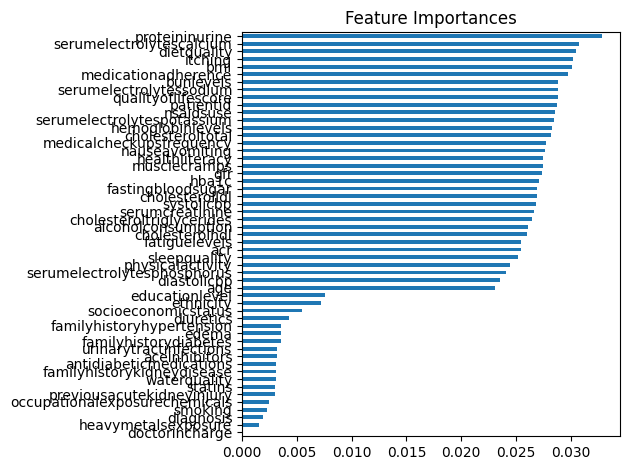

In [ ]:
#Feature Importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()